In [ ]:
from numpy import load

circuit1_npz = load('./Circuit1/spectrum-f_min_0-f_max_12501-f_step_250.npz')
circuit2_npz = load('./Circuit1/spectrum-f_min_0-f_max_12501-f_step_250.npz')

circuit1_npz_array = circuit1_npz['arr_0']
circuit2_npz_array = circuit2_npz['arr_0']

with open(f'circuit1_data.csv', 'w') as f:
        f.write('Frequency,Z_real,Z_imag')
with open(f'circuit2_data.csv', 'w') as f:
        f.write('Frequency,Z_real,Z_imag')

for i in range(0, len(circuit1_npz_array)):
    frequency = i * 250
    with open(f'circuit1_data.csv', 'a') as f:
        real_part = circuit1_npz_array[i].real
        imag_part = circuit1_npz_array[i].imag
        f.write(f"{frequency},{real_part},{imag_part}\n")
        f.write(str(circuit1_npz_array[i]))
    with open(f'circuit2_data.csv', 'a') as f:
        real_part = circuit2_npz_array[i].real
        imag_part = circuit2_npz_array[i].imag
        f.write(f"{frequency},{real_part},{imag_part}\n")
        f.write(str(circuit2_npz_array[i]))

0
(741.9514039900901+0j)
(741.9514039900901+0j)

1
(573.9755603686963-245.5478595325276j)
(573.9755603686963-245.5478595325276j)

2
(411.2732631963826-255.47869551535152j)
(411.2732631963826-255.47869551535152j)

3
(333.02036142695505-229.0620322213316j)
(333.02036142695505-229.0620322213316j)

4
(290.0976597553983-207.82002392782698j)
(290.0976597553983-207.82002392782698j)

5
(261.3623767021828-192.89584546262637j)
(261.3623767021828-192.89584546262637j)

6
(239.38476432494937-181.90895245025808j)
(239.38476432494937-181.90895245025808j)

7
(221.0000401346539-172.92198545062902j)
(221.0000401346539-172.92198545062902j)

8
(205.17657175106285-165.02075415266148j)
(205.17657175106285-165.02075415266148j)

9
(191.49666275938264-157.6113030387627j)
(191.49666275938264-157.6113030387627j)

10
(179.5561800275099-150.45350809414245j)
(179.5561800275099-150.45350809414245j)

11
(169.0638464183982-143.53169238168294j)
(169.0638464183982-143.53169238168294j)

12
(159.90332771130525-136.8318160

In [ ]:
import numpy as np
import random
import pandas as pd

def log_likelihood(Z_i, omega_i, R, C, sigma):
    """
    Calculates the likelihood of observing the measured impedance data given 
    a specific circuit model and its parameters.

    Args:
        Z_i (complex): Measured impedance at frequency omega_i.
        omega_i (float): Angular frequency.
        R (list): List of resistance values in the circuit model.
        C (list): List of capacitance values in the circuit model.
        sigma (float): Standard deviation of the measurement noise.

    Returns:
        float: Likelihood value.
    """
    
    # Calculate impedance from the circuit model
    z_omega_i = circuit_impedance(omega_i, R, C)
    log_likelihood_value = -(1 / (2 * sigma**2)) * abs(Z_i - z_omega_i)**2 - np.log(np.sqrt(2 * np.pi * sigma**2))

    return log_likelihood_value  # Return the log-likelihood

def circuit_impedance(omega_i, R, C):
    """
    Calculates the impedance of the circuit model at a given frequency.

    Args:
        omega_i (float): Angular frequency.
        R (list): List of resistance values in the circuit model.
        C (list): List of capacitance values in the circuit model.

    Returns:
        complex: Impedance of the circuit model.
    """
    
    # This is a placeholder for the actual impedance calculation.
    # You'll need to replace this with the correct formula for your circuit model.
    # For example, for a simple RC circuit:
    # z_omega_i = R[0] / (1 + 1j * omega_i * R[0] * C[0])  
    
    # For the circuits in your assignment, you'll need to use the impedance formulas
    # for parallel RC circuits connected in series.
    z_omega_i = 0
    for i in range(len(R)):  # Assuming len(R) == len(C)
        z_omega_i += R[i] / (1 + 1j * omega_i * R[i] * C[i])
    
    return z_omega_i

def log_prior(R, C, R_min=100, R_max=10e3, C_min=10e-9, C_max=10e-6):
    """
    Calculates the prior probability of the circuit parameters.

    Args:
        R (list): List of resistance values.
        C (list): List of capacitance values.
        R_min (float, optional): Minimum resistance value. Defaults to 100.
        R_max (float, optional): Maximum resistance value. Defaults to 10e3.
        C_min (float, optional): Minimum capacitance value. Defaults to 10e-9.
        C_max (float, optional): Maximum capacitance value. Defaults to 10e-6.

    Returns:
        float: Prior probability value.
    """
    
    for r in R:
        if not (R_min <= r <= R_max):
            return -np.inf  # Prior is 0 if resistance is outside the allowed range
    for c in C:
        if not (C_min <= c <= C_max):
            return -np.inf  # Prior is 0 if capacitance is outside the allowed range
    
    # If all parameters are within the allowed range, use uniform prior
    return 0  # Log of a uniform distribution is 0  

def log_posterior(omega_n, Z_n, K, R, C, sigma):
    """
    Calculates the posterior probability of the circuit parameters given the 
    observed data and the prior.

    Args:
        omega_n (list): List of angular frequencies.
        Z_n (list): List of measured impedances.
        K (int): Number of RC parallel circuits in the model.
        R (list): List of resistance values.
        C (list): List of capacitance values.
        sigma (float): Standard deviation of the measurement noise.

    Returns:
        float: Posterior probability value.
    """   
    log_prior_prob = log_prior(R, C)
    if log_prior_prob == -np.inf:
        return -np.inf  # If log-prior is -inf, log-posterior is also -inf

    log_likelihood_prob = 0
    for i in range(len(omega_n)):
        log_likelihood_prob += log_likelihood(Z_n[i], omega_n[i], R, C, sigma)

    log_posterior_prob = log_likelihood_prob + log_prior_prob
    return log_posterior_prob  # Return the un-logged posterior probability


def metropolis(omega_n, Z_n, K, sigma, n_iterations=10000, burn_in=1000, 
              R_min=100, R_max=10e3, C_min=10e-9, C_max=10e-6):
    """
    Performs Metropolis sampling to estimate the circuit parameters.

    Args:
        omega_n (list): List of angular frequencies.
        Z_n (list): List of measured impedances.
        K (int): Number of RC parallel circuits in the model.
        sigma (float): Standard deviation of the measurement noise.
        n_iterations (int, optional): Number of MCMC iterations. Defaults to 10000.
        burn_in (int, optional): Number of initial samples to discard. Defaults to 1000.
        R_min (float, optional): Minimum resistance value. Defaults to 100.
        R_max (float, optional): Maximum resistance value. Defaults to 10e3.
        C_min (float, optional): Minimum capacitance value. Defaults to 10e-9.
        C_max (float, optional): Maximum capacitance value. Defaults to 10e-6.

    Returns:
        tuple: A tuple containing the accepted R and C samples.
    """

    # Initialize parameters
    R_current = [random.uniform(R_min, R_max) for _ in range(K)]
    C_current = [random.uniform(C_min, C_max) for _ in range(K)]
    accepted_proposals = 0
    # Store accepted samples
    R_samples = []
    C_samples = []
    
    for _ in range(n_iterations):
        # Propose new parameters
        R_proposal = [r + random.uniform(-5, 5) for r in R_current]
        C_proposal = [c + random.uniform(-10e-9, 10e-9) for c in C_current]

        # Calculate posterior probabilities
        log_posterior_current = log_posterior(omega_n, Z_n, K, R_current, C_current, sigma)
        log_posterior_proposal = log_posterior(omega_n, Z_n, K, R_proposal, C_proposal, sigma)

        # Calculate log of acceptance ratio
        log_acceptance_ratio = log_posterior_proposal - log_posterior_current
        acceptance_ratio = min(0, log_acceptance_ratio)  # 0 if log_acceptance_ratio is positive, else log_acceptance_ratio

        # Accept or reject proposal (using exp(acceptance_ratio) since acceptance_ratio is in log space)
        if np.log(random.uniform(0, 1)) < acceptance_ratio:
            R_current = R_proposal
            C_current = C_proposal
            accepted_proposals += 1
        # Store accepted samples after burn-in
        if _ > burn_in:
            R_samples.append(R_current)
            C_samples.append(C_current)

    return R_current, C_current, accepted_proposals, R_samples, C_samples

data = pd.read_csv('circuit1_data.csv')
frequency_list = data['Frequency']  # Hz
# Z_real_measurements = data['Z_real']  # Real part of impedance
# Z_real_measurements =  data['Z_imag']# Imaginary part of impedance
Z_complex = np.array( data['Z_real']) + 1j * np.array( data['Z_imag'])

itterations = 10000
R_n, C_n, accepted_proposals, R_samples, C_samples = metropolis(frequency_list, Z_complex, 2, 1, n_iterations=itterations)
acceptance_rate = accepted_proposals / itterations * 100
print(f"Acceptance Rate: {acceptance_rate:.2f}%")
print(f"Estimated R value: {np.mean(R_n):.2f}")
print(f"Estimated C value: {np.mean(C_n):.2e} F")

Acceptance Rate: 38.02%
Estimated R value: 521.00
Estimated C value: 1.55e-06 F


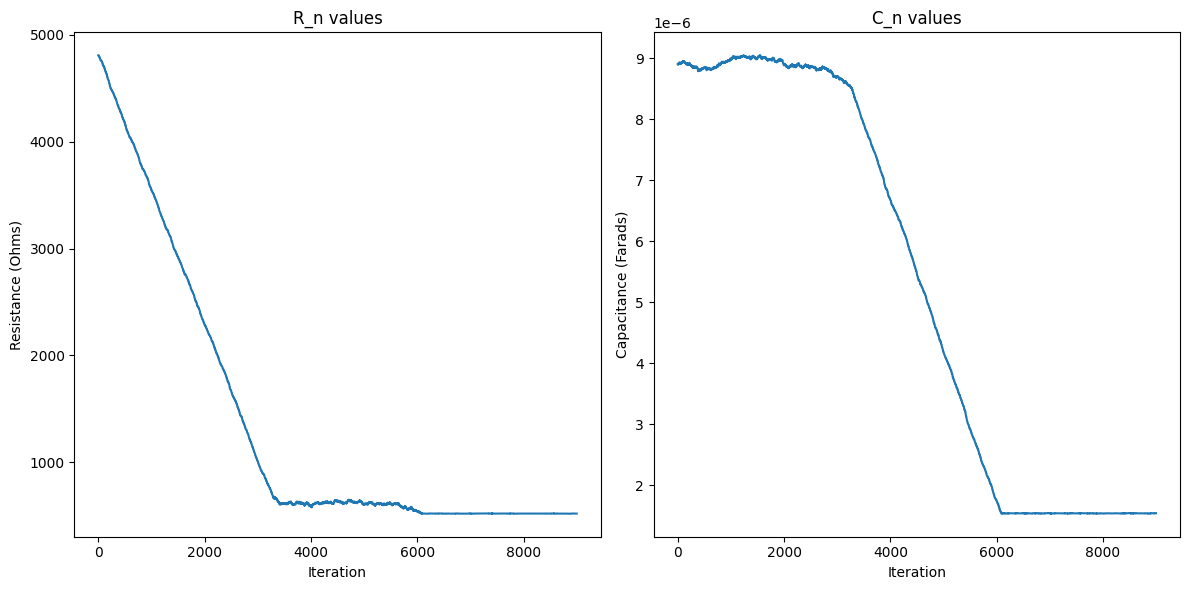

In [57]:
import matplotlib.pyplot as plt

# Plot R_n
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(R_samples)
plt.title('R_n values')
plt.xlabel('Iteration')
plt.ylabel('Resistance (Ohms)')

# Plot C_n
plt.subplot(1, 2, 2)
plt.plot(C_samples)
plt.title('C_n values')
plt.xlabel('Iteration')
plt.ylabel('Capacitance (Farads)')

plt.tight_layout()
plt.show()